C:\Users\golis\AppData\Local\Temp/ipykernel_21376/2609936273.py:7: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  dateparse = lambda dates: pd.datetime.strptime(dates, "%d-%m-%Y")


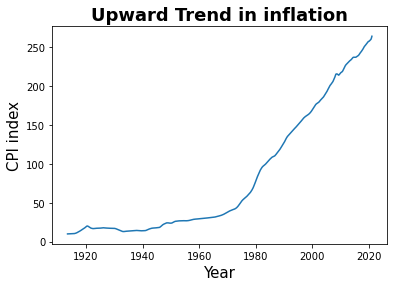

In [108]:
#Importing libraries
import pandas as pd
import matplotlib.pyplot as plt
# Loading statsmodel method to perform decomposition
from statsmodels.tsa.seasonal import seasonal_decompose
# Another way to load a time series data by defining a date format
dateparse = lambda dates: pd.datetime.strptime(dates, "%d-%m-%Y")
cpi = pd.read_csv('US CPI.csv', index_col='Yearmon',date_parser=dateparse)
# Visualizing trend of Airpassengers data
plt.plot(seasonal_decompose(cpi).trend)
plt.xlabel('Year', fontsize=15)
plt.ylabel('CPI index', fontsize=15)
plt.title('Upward Trend in inflation', weight='bold', fontsize=18)
plt.show()

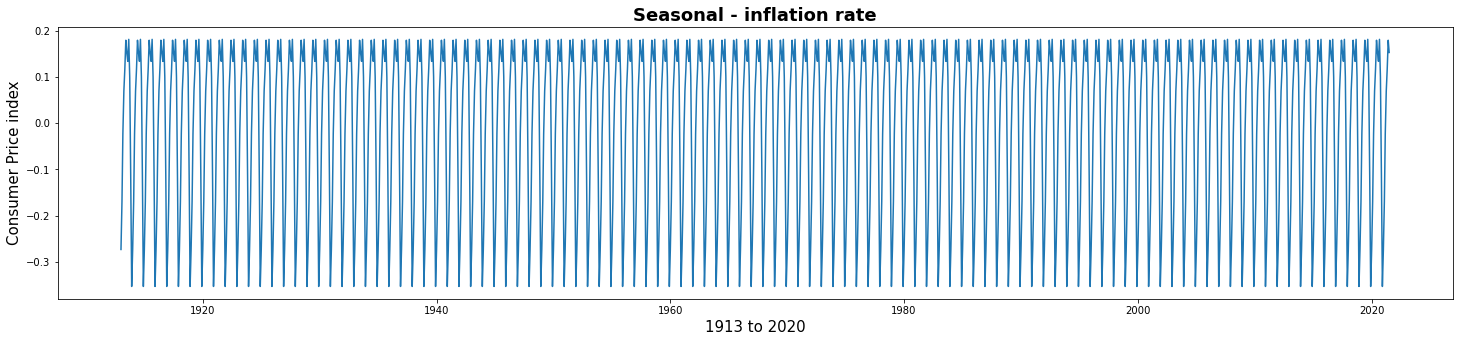

In [109]:
#importing libraries
import matplotlib.pyplot as plt
# Visualizing seasonality of cpi data
plt.figure(figsize=(25, 5))
plt.plot(seasonal_decompose(cpi).seasonal)
plt.xlabel('1913 to 2020', fontsize=15)
plt.ylabel('Consumer Price index', fontsize=15)
plt.title('Seasonal - inflation rate', weight='bold', fontsize=18)
plt.show()



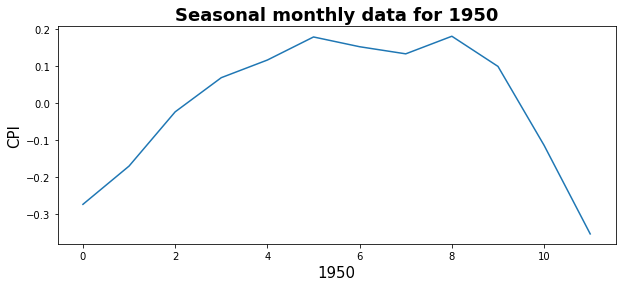

In [110]:
# Visualizing seasonality of cpi data for year 1913
plt.figure(figsize=(10, 4))
#plt.plot(seasonal_decompose(cpi).seasonal.values[1:12])
year='1950'
plt.plot(seasonal_decompose(cpi).seasonal.filter(regex=year,axis=0).values)
plt.xlabel(year, fontsize=15)
plt.ylabel('CPI', fontsize=15)
plt.title('Seasonal monthly data for'+ ' ' +year, weight='bold', fontsize=18)
plt.show()

In [111]:
#seasonal_decompose(cpi).seasonal.filter(regex='1913',axis=0).values

In [112]:
#seasonal_decompose(cpi).seasonal.index

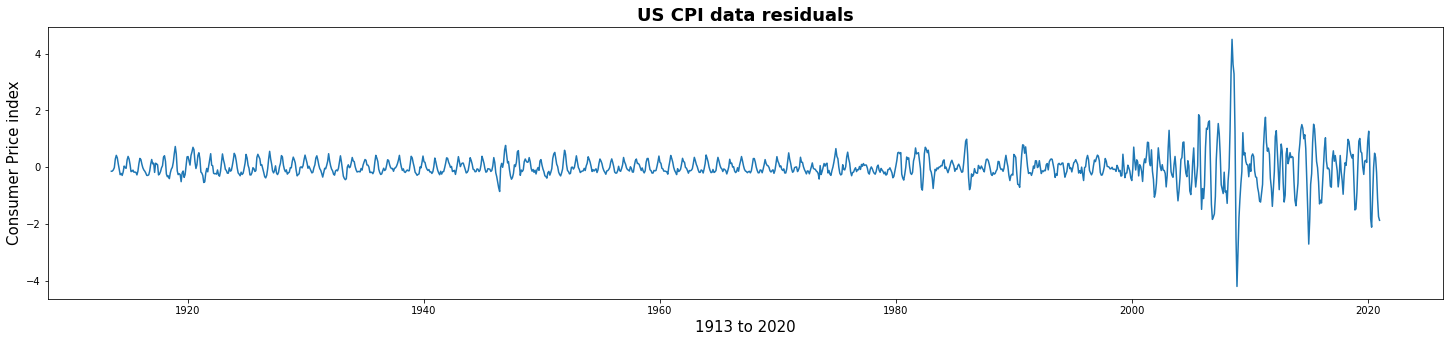

In [113]:
#importing libraries
import matplotlib.pyplot as plt
# Visualizing seasonality of cpi data
plt.figure(figsize=(25, 5))
plt.plot(seasonal_decompose(cpi).resid)
plt.xlabel('1913 to 2020', fontsize=15)
plt.ylabel('Consumer Price index', fontsize=15)
plt.title('US CPI data residuals', weight='bold', fontsize=18)
plt.show()

#observation: high fluctations from 2000 to 2020 .seems at 2007/2008 high fluctuations in the period where inflation rate is very high

In [96]:
#print(cpi.index.min())
#print(cpi.index.max())

1913-01-01 00:00:00
2021-07-01 00:00:00


In [117]:
#cpi[-7:]
cpi_2021=cpi[-7:].copy()
cpi_2021.head(7)

,CPI
Yearmon,
2021-01-01,261.582
2021-02-01,263.014
2021-03-01,264.877
2021-04-01,267.054
2021-05-01,269.195
2021-06-01,271.696
2021-07-01,273.003


In [118]:
#removing 2021 values
cpi=cpi[:-7]
#cpi[-7:]

In [119]:
from statsmodels.tsa.seasonal import seasonal_decompose
# Getting data corresponding to each month
cols = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
cpi_reshaped = pd.DataFrame(cpi.values.reshape(-1, 12), 
                         columns=cols,                        # Month 
                         index=range(1913, 2021))             # Year
cpi_reshaped

,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
1913,9.800,9.800,9.800,9.800,9.700,9.800,9.900,9.900,10.000,10.000,10.100,10.000
1914,10.000,9.900,9.900,9.800,9.900,9.900,10.000,10.200,10.200,10.100,10.200,10.100
1915,10.100,10.000,9.900,10.000,10.100,10.100,10.100,10.100,10.100,10.200,10.300,10.300
1916,10.400,10.400,10.500,10.600,10.700,10.800,10.800,10.900,11.100,11.300,11.500,11.600
1917,11.700,12.000,12.000,12.600,12.800,13.000,12.800,13.000,13.300,13.500,13.500,13.700
...,...,...,...,...,...,...,...,...,...,...,...,...
2016,236.916,237.111,238.132,239.261,240.229,241.018,240.628,240.849,241.428,241.729,241.353,241.432
2017,242.839,243.603,243.801,244.524,244.733,244.955,244.786,245.519,246.819,246.663,246.669,246.524
2018,247.867,248.991,249.554,250.546,251.588,251.989,252.006,252.146,252.439,252.885,252.038,251.233
2019,251.712,252.776,254.202,255.548,256.092,256.143,256.571,256.558,256.759,257.346,257.208,256.974


In [120]:
# Importing libraries
import numpy as np
import pandas as pd
# Extracting the seasonal values
seasonal_data = np.round(seasonal_decompose(cpi, model='additive').seasonal, 2)
# Getting output corresponding to each month
cpi_season = pd.DataFrame(seasonal_data.values.reshape(-1, 12), 
                         columns=cols,                        # Month 
                         index=range(1913, 2021))             # Year
cpi_season


,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
1913,-0.26,-0.17,-0.03,0.07,0.11,0.18,0.15,0.13,0.17,0.1,-0.11,-0.34
1914,-0.26,-0.17,-0.03,0.07,0.11,0.18,0.15,0.13,0.17,0.1,-0.11,-0.34
1915,-0.26,-0.17,-0.03,0.07,0.11,0.18,0.15,0.13,0.17,0.1,-0.11,-0.34
1916,-0.26,-0.17,-0.03,0.07,0.11,0.18,0.15,0.13,0.17,0.1,-0.11,-0.34
1917,-0.26,-0.17,-0.03,0.07,0.11,0.18,0.15,0.13,0.17,0.1,-0.11,-0.34
...,...,...,...,...,...,...,...,...,...,...,...,...
2016,-0.26,-0.17,-0.03,0.07,0.11,0.18,0.15,0.13,0.17,0.1,-0.11,-0.34
2017,-0.26,-0.17,-0.03,0.07,0.11,0.18,0.15,0.13,0.17,0.1,-0.11,-0.34
2018,-0.26,-0.17,-0.03,0.07,0.11,0.18,0.15,0.13,0.17,0.1,-0.11,-0.34
2019,-0.26,-0.17,-0.03,0.07,0.11,0.18,0.15,0.13,0.17,0.1,-0.11,-0.34


<Figure size 1800x720 with 0 Axes>

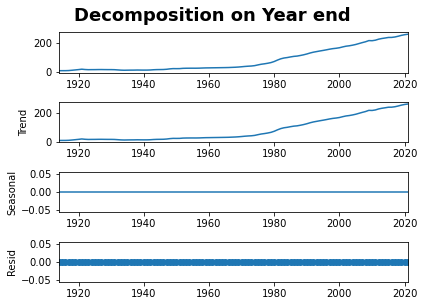

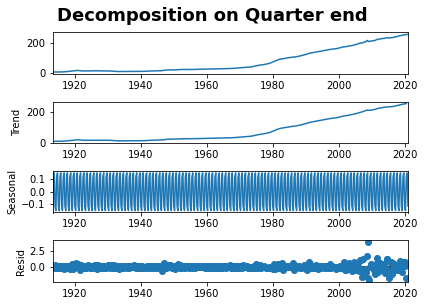

In [179]:
# Importing libraries
plt.figure(figsize=(25,10))
# Decomposition of cpi data on year end taking mean of monthly values
year_end = cpi.resample('A').mean() # Here, DateOffset 'A' represents Year end
seasonal_decompose(year_end, model='additive').plot()
plt.suptitle('Decomposition on Year end', weight='bold', fontsize=18, y=1.05)
plt.show()
# Decomposition of cpi data on quarter end taking mean of monthly values
quarter_end = cpi.resample('Q').mean() # Here, DateOffset 'Q' represents Quarter end
seasonal_decompose(quarter_end, model='additive').plot()
plt.suptitle('Decomposition on Quarter end', weight='bold', fontsize=18, y=1.05)
plt.show()



In [144]:
sea=seasonal_decompose(year_end, model='additive')

In [149]:
sea.observed.index
sea.observed.values

DatetimeIndex(['1913-12-31', '1914-12-31', '1915-12-31', '1916-12-31',
               '1917-12-31', '1918-12-31', '1919-12-31', '1920-12-31',
               '1921-12-31', '1922-12-31',
               ...
               '2011-12-31', '2012-12-31', '2013-12-31', '2014-12-31',
               '2015-12-31', '2016-12-31', '2017-12-31', '2018-12-31',
               '2019-12-31', '2020-12-31'],
              dtype='datetime64[ns]', name='Yearmon', length=108, freq='A-DEC')

In [150]:
cpi_reshaped.shape

(108, 12)

<function matplotlib.pyplot.show(close=None, block=None)>

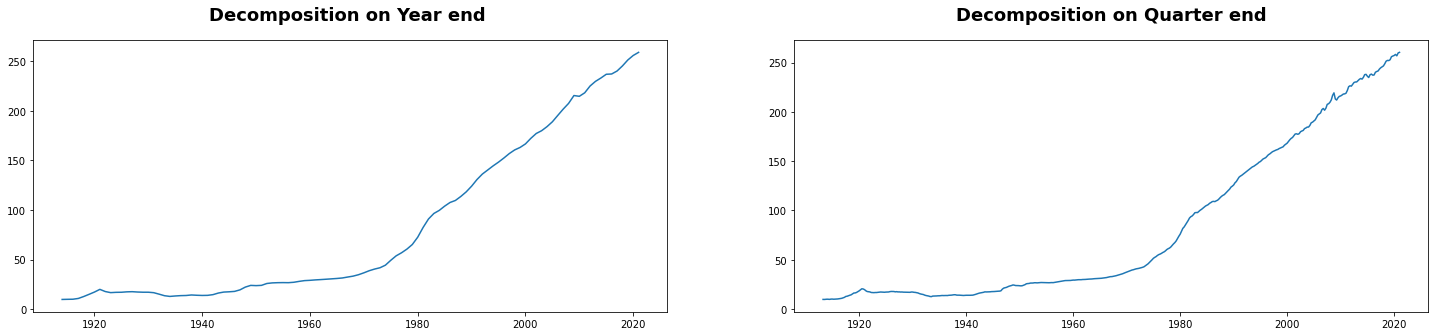

In [181]:
'''# Importing libraries
plt.figure(figsize=(25, 5))
plt.subplot(1,2,1)
# Decomposition of cpi data on year end taking mean of monthly values
year_end = cpi.resample('A').mean() # Here, DateOffset 'A' represents Year end
sea=seasonal_decompose(year_end, model='additive')
plt.plot(sea.observed.index,sea.observed.values)
plt.title('Decomposition on Year end ', weight='bold', fontsize=18, y=1.05)
# Decomposition of cpi data on quarter end taking mean of monthly values
plt.subplot(1,2,2)
quarter_end = cpi.resample('Q').mean() # Here, DateOffset 'Q' represents Quarter end
sea_q=seasonal_decompose(quarter_end, model='additive')
plt.plot(sea_q.observed.index,sea_q.observed.values)
plt.title('Decomposition on Quarter end', weight='bold', fontsize=18, y=1.05)
plt.show
'''

In [182]:
# Deseasonalized data
cpi_deseasonalized =cpi_reshaped - cpi_season
cpi_deseasonalized

,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
1913,10.060,9.970,9.830,9.730,9.590,9.620,9.750,9.770,9.830,9.900,10.210,10.340
1914,10.260,10.070,9.930,9.730,9.790,9.720,9.850,10.070,10.030,10.000,10.310,10.440
1915,10.360,10.170,9.930,9.930,9.990,9.920,9.950,9.970,9.930,10.100,10.410,10.640
1916,10.660,10.570,10.530,10.530,10.590,10.620,10.650,10.770,10.930,11.200,11.610,11.940
1917,11.960,12.170,12.030,12.530,12.690,12.820,12.650,12.870,13.130,13.400,13.610,14.040
...,...,...,...,...,...,...,...,...,...,...,...,...
2016,237.176,237.281,238.162,239.191,240.119,240.838,240.478,240.719,241.258,241.629,241.463,241.772
2017,243.099,243.773,243.831,244.454,244.623,244.775,244.636,245.389,246.649,246.563,246.779,246.864
2018,248.127,249.161,249.584,250.476,251.478,251.809,251.856,252.016,252.269,252.785,252.148,251.573
2019,251.972,252.946,254.232,255.478,255.982,255.963,256.421,256.428,256.589,257.246,257.318,257.314


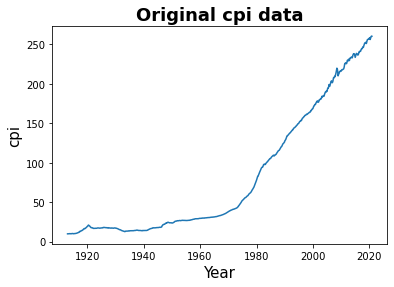

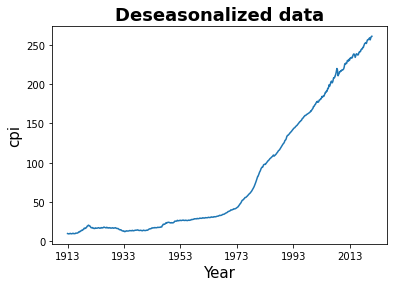

In [197]:
# Importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
# Melting the data by forming a 1D data to proceed with visualization
plt.plot(cpi)
plt.xlabel('Year', fontsize=15)
plt.ylabel('cpi', fontsize=15)
plt.title('Original cpi data', weight='bold', fontsize=18)
plt.show()
# Melting the data by forming it to a 1D data to proceed with visualization
plt.plot(pd.melt(cpi_deseasonalized.T).value)
plt.xticks(np.linspace(0, 1200, 6), np.unique(pd.melt(cpi_deseasonalized.T).variable)[::20])
plt.xlabel('Year', fontsize=15)
plt.ylabel('cpi', fontsize=15)
plt.title('Deseasonalized data', weight='bold', fontsize=18)
plt.show()


In [203]:
#np.unique(pd.melt(cpi_deseasonalized.T).variable)[::5]
#0 to 1200 range of the graph

array([1913, 1918, 1923, 1928, 1933, 1938, 1943, 1948, 1953, 1958, 1963,
       1968, 1973, 1978, 1983, 1988, 1993, 1998, 2003, 2008, 2013, 2018],
      dtype=int64)

In [204]:
#pd.melt(cpi_deseasonalized.T).head(2)

,variable,value
0,1913,10.06
1,1913,9.97


In [187]:
#np.linspace(0, 140, 6)

array([  0.,  28.,  56.,  84., 112., 140.])

In [205]:
##Multiplicative model

In [207]:
# Importing libraries
import numpy as np
import pandas as pd
# Extracting the seasonal values
seasonal_data_mult = np.round(seasonal_decompose(cpi, model='multiplicative').seasonal, 2)
# Getting output corresponding to each month
cpi_season_mult = pd.DataFrame(seasonal_data_mult.values.reshape(-1, 12), 
                         columns=cols,                        # Month 
                         index=range(1913, 2021))             # Year
cpi_season_mult


,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
1913,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
1914,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
1915,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
1916,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
1917,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...
2016,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
2017,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
2018,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
2019,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


In [208]:
# Importing libraries
import numpy as np
# Multiplicative Deseasonalized data
cpi_deseasonalized_mult = np.round(cpi_reshaped / cpi_season_mult, 2)
cpi_deseasonalized_mult


,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
1913,9.80,9.80,9.80,9.80,9.70,9.80,9.90,9.90,10.00,10.00,10.10,10.00
1914,10.00,9.90,9.90,9.80,9.90,9.90,10.00,10.20,10.20,10.10,10.20,10.10
1915,10.10,10.00,9.90,10.00,10.10,10.10,10.10,10.10,10.10,10.20,10.30,10.30
1916,10.40,10.40,10.50,10.60,10.70,10.80,10.80,10.90,11.10,11.30,11.50,11.60
1917,11.70,12.00,12.00,12.60,12.80,13.00,12.80,13.00,13.30,13.50,13.50,13.70
...,...,...,...,...,...,...,...,...,...,...,...,...
2016,236.92,237.11,238.13,239.26,240.23,241.02,240.63,240.85,241.43,241.73,241.35,241.43
2017,242.84,243.60,243.80,244.52,244.73,244.96,244.79,245.52,246.82,246.66,246.67,246.52
2018,247.87,248.99,249.55,250.55,251.59,251.99,252.01,252.15,252.44,252.88,252.04,251.23
2019,251.71,252.78,254.20,255.55,256.09,256.14,256.57,256.56,256.76,257.35,257.21,256.97


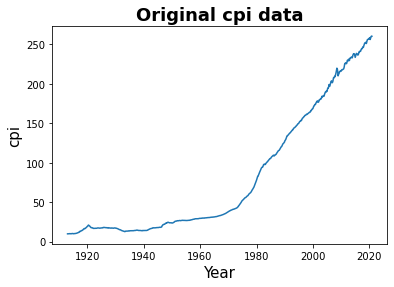

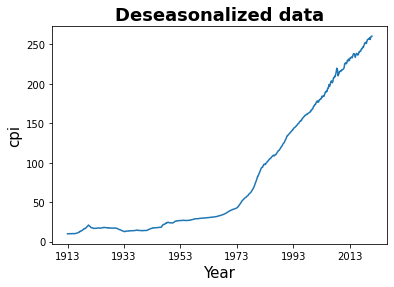

In [209]:
# Importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
# Melting the data by forming a 1D data to proceed with visualization
plt.plot(cpi)
plt.xlabel('Year', fontsize=15)
plt.ylabel('cpi', fontsize=15)
plt.title('Original cpi data', weight='bold', fontsize=18)
plt.show()
# Melting the data by forming it to a 1D data to proceed with visualization
plt.plot(pd.melt(cpi_deseasonalized_mult.T).value)
plt.xticks(np.linspace(0, 1200, 6), np.unique(pd.melt(cpi_deseasonalized_mult.T).variable)[::20])
plt.xlabel('Year', fontsize=15)
plt.ylabel('cpi', fontsize=15)
plt.title('Deseasonalized data', weight='bold', fontsize=18)
plt.show()


In [210]:
# Importing libraries
import numpy as np
# Exponential smoothing is calculated and rounded off to 2 decimal values
np.round(cpi.ewm(alpha=0.2,adjust=False).mean().head(),2)


,CPI
Yearmon,
1913-01-01,9.80
1913-02-01,9.80
1913-03-01,9.80
1913-04-01,9.80
1913-05-01,9.78


In [211]:
cpi.head(5)

,CPI
Yearmon,
1913-01-01,9.8
1913-02-01,9.8
1913-03-01,9.8
1913-04-01,9.8
1913-05-01,9.7


In [213]:
#setting the frequency
cpi_freq = cpi.resample('M').mean()
cpi_freq.head()

,CPI
Yearmon,
1913-01-31,9.8
1913-02-28,9.8
1913-03-31,9.8
1913-04-30,9.8
1913-05-31,9.7


In [214]:
cpi_freq.shape

(1296, 1)

In [217]:
#setting the frequency
cpi_freq_2021 = cpi_2021.resample('M').mean()
cpi_freq_2021.head()

,CPI
Yearmon,
2021-01-31,261.582
2021-02-28,263.014
2021-03-31,264.877
2021-04-30,267.054
2021-05-31,269.195


In [220]:
# Importing libraries
import warnings
warnings.filterwarnings('ignore')
import numpy as np
# Simple exponential smoothing
# Finding alpha value for the forecasted value and mean squared error
from statsmodels.tsa.holtwinters import SimpleExpSmoothing
from sklearn.metrics import mean_squared_error
for i in range(1, 11):
    model = SimpleExpSmoothing(cpi_freq.iloc[:1296]).fit(smoothing_level=i/10, optimized=False)
    forecasted_val = np.round(model.forecast(1)[0], 2)
    print('alpha = ', i/10, '| Forecasted value: ', forecasted_val, 
          '| MSE: ', np.round(mean_squared_error(np.array(cpi_freq_2021.iloc[0]), np.array([forecasted_val])), 2))


alpha =  0.1 | Forecasted value:  257.8 | MSE:  14.3
alpha =  0.2 | Forecasted value:  259.38 | MSE:  4.85
alpha =  0.3 | Forecasted value:  259.9 | MSE:  2.83
alpha =  0.4 | Forecasted value:  260.17 | MSE:  1.99
alpha =  0.5 | Forecasted value:  260.3 | MSE:  1.64
alpha =  0.6 | Forecasted value:  260.37 | MSE:  1.47
alpha =  0.7 | Forecasted value:  260.41 | MSE:  1.37
alpha =  0.8 | Forecasted value:  260.43 | MSE:  1.33
alpha =  0.9 | Forecasted value:  260.45 | MSE:  1.28
alpha =  1.0 | Forecasted value:  260.47 | MSE:  1.24


In [227]:
print(cpi_freq.iloc[:1296].index)
print(cpi_freq_2021.iloc[0])

DatetimeIndex(['1913-01-31', '1913-02-28', '1913-03-31', '1913-04-30',
               '1913-05-31', '1913-06-30', '1913-07-31', '1913-08-31',
               '1913-09-30', '1913-10-31',
               ...
               '2020-03-31', '2020-04-30', '2020-05-31', '2020-06-30',
               '2020-07-31', '2020-08-31', '2020-09-30', '2020-10-31',
               '2020-11-30', '2020-12-31'],
              dtype='datetime64[ns]', name='Yearmon', length=1296, freq='M')
CPI    261.582
Name: 2021-01-31 00:00:00, dtype: float64


In [228]:
# Importing libraries
import numpy as np
import scipy as sp
# Function to find optimum value of alpha
def optimum_alpha(x):
    model = SimpleExpSmoothing(cpi_freq.iloc[:1296]).fit(smoothing_level=x, optimized = False)
    forecasted_val = np.round(model.forecast(1)[0], 2)
    mse = np.round(mean_squared_error(np.array(cpi_freq.iloc[0]), np.array([forecasted_val])), 2)
    print('alpha: ', np.round(x[0], 5), 'MSE: ', mse)
    return mse
optimum_alpha_result = sp.optimize.fmin(optimum_alpha, x0=1)
if optimum_alpha_result < 0:
    optimum_alpha_result = 0.001 # Least value, you can perform further optimization to improve it
optimum_alpha_result   


alpha:  1.0 MSE:  62835.45
alpha:  1.05 MSE:  62845.48
alpha:  0.95 MSE:  62830.44
alpha:  0.9 MSE:  62825.42
alpha:  0.8 MSE:  62815.4
alpha:  0.7 MSE:  62805.37
alpha:  0.5 MSE:  62750.25
alpha:  0.3 MSE:  62550.01
alpha:  -0.1 MSE:  4.80889713622091e+105
alpha:  0.5 MSE:  62750.25
alpha:  0.1 MSE:  61504.0
alpha:  -0.1 MSE:  4.80889713622091e+105
alpha:  -0.1 MSE:  4.80889713622091e+105
alpha:  0.2 MSE:  62290.18
alpha:  -0.0 MSE:  0.0
alpha:  -0.1 MSE:  4.80889713622091e+105
alpha:  -0.1 MSE:  4.80889713622091e+105
alpha:  0.05 MSE:  59804.7
alpha:  -0.05 MSE:  3.944358717709643e+54
alpha:  0.025 MSE:  56529.82
alpha:  -0.025 MSE:  2.7258934020858266e+28
alpha:  0.0125 MSE:  50140.17
alpha:  -0.0125 MSE:  1397087060702885.0
alpha:  0.00625 MSE:  38376.81
alpha:  -0.00625 MSE:  443241019.82
alpha:  0.00312 MSE:  22764.77
alpha:  -0.00313 MSE:  962831.94
alpha:  0.00156 MSE:  10132.44
alpha:  -0.00156 MSE:  57408.16
alpha:  0.00078 MSE:  3571.26
alpha:  -0.00078 MSE:  8357.62
alpha: 

0.001